Data cleaning & Analysis in Pandas

In [ ]:
1. Business understanding and Defining Business Question

2.0 Reading the Data

In [226]:
# Import libraries 

import sqlite3
import pandas as pd

2.1 Loading the Dataset

In [228]:
# Import dataset 1
# Connect to the SQLite database 

conn = sqlite3.connect('im.db')

# Create a cursor object to interact with the database
cursor = conn.cursor()

In [229]:
cursor.execute("""SELECT * FROM movie_basics;""").fetchall()


[('tt0063540', 'Sunghursh', 'Sunghursh', 2013, 175.0, 'Action,Crime,Drama'),
 ('tt0066787',
  'One Day Before the Rainy Season',
  'Ashad Ka Ek Din',
  2019,
  114.0,
  'Biography,Drama'),
 ('tt0069049',
  'The Other Side of the Wind',
  'The Other Side of the Wind',
  2018,
  122.0,
  'Drama'),
 ('tt0069204',
  'Sabse Bada Sukh',
  'Sabse Bada Sukh',
  2018,
  None,
  'Comedy,Drama'),
 ('tt0100275',
  'The Wandering Soap Opera',
  'La Telenovela Errante',
  2017,
  80.0,
  'Comedy,Drama,Fantasy'),
 ('tt0111414', 'A Thin Life', 'A Thin Life', 2018, 75.0, 'Comedy'),
 ('tt0112502', 'Bigfoot', 'Bigfoot', 2017, None, 'Horror,Thriller'),
 ('tt0137204',
  'Joe Finds Grace',
  'Joe Finds Grace',
  2017,
  83.0,
  'Adventure,Animation,Comedy'),
 ('tt0139613', 'O Silêncio', 'O Silêncio', 2012, None, 'Documentary,History'),
 ('tt0144449',
  'Nema aviona za Zagreb',
  'Nema aviona za Zagreb',
  2012,
  82.0,
  'Biography'),
 ('tt0146592', 'Pál Adrienn', 'Pál Adrienn', 2010, 136.0, 'Drama'),
 ('tt

In [230]:
# Import movie_basics table using pandas
import pandas as pd

pd.DataFrame(
    data=cursor.execute("""SELECT * FROM movie_basics;""").fetchall(),
    columns=[x[0] for x in cursor.description]
)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [231]:
# Import movie_ratings table using pandas

pd.DataFrame(
    data=cursor.execute("""SELECT * FROM movie_ratings;""").fetchall(),
    columns=[x[0] for x in cursor.description]
)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [233]:
# Now that we have the connection, we can use the pd.read_sql method instead of using cursor
df = pd.read_sql("""SELECT * FROM movie_basics;""", conn)
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [234]:
# Import directors table
pd.DataFrame(
    data=cursor.execute("""SELECT * FROM directors;""").fetchall(),
    columns=[x[0] for x in cursor.description]
)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [235]:
# This is the writers table. It's important because we'll dig about writers and their effect on movie ratings
pd.DataFrame(
    data=cursor.execute("""SELECT * FROM writers;""").fetchall(),
    columns=[x[0] for x in cursor.description]
)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [236]:
# This is the persons table. It's important because we'll dig about actors and their effect on movie ratings
pd.DataFrame(
    data=cursor.execute("""SELECT * FROM persons;""").fetchall(),
    columns=[x[0] for x in cursor.description]
)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [237]:
# We're going to join all the data from the chosen tables(movie_basics, movie_ratings, directors, persons) to make it easier to handle to the data
#These are the columns we need; mb.movie_id, mb.primary_title, mb.genres, mb.start_year, mb.runtime_minutes, mr. averagerating, mr.numvotes, p.primary_name, p.primary_profession, d.person_id

q = """
SELECT mb.movie_id, mb.primary_title, mb.genres, mb.start_year, mb.runtime_minutes, mr. averagerating, mr.numvotes, p.primary_name, p.primary_profession, d.person_id
FROM movie_basics mb
JOIN movie_ratings mr
    ON mb.movie_id = mr.movie_id
JOIN directors d
    ON mb.movie_id = d.movie_id
JOIN persons p
    ON d.person_id = p.person_id
;
"""
df = pd.read_sql(q, conn) 

In [238]:
# Show the first five rows to better understand the data

df.head()

,movie_id,primary_title,genres,start_year,runtime_minutes,averagerating,numvotes,primary_name,primary_profession,person_id
0,tt0063540,Sunghursh,"Action,Crime,Drama",2013,175.0,7.0,77,Harnam Singh Rawail,"director,writer,producer",nm0712540
1,tt0063540,Sunghursh,"Action,Crime,Drama",2013,175.0,7.0,77,Harnam Singh Rawail,"director,writer,producer",nm0712540
2,tt0063540,Sunghursh,"Action,Crime,Drama",2013,175.0,7.0,77,Harnam Singh Rawail,"director,writer,producer",nm0712540
3,tt0063540,Sunghursh,"Action,Crime,Drama",2013,175.0,7.0,77,Harnam Singh Rawail,"director,writer,producer",nm0712540
4,tt0066787,One Day Before the Rainy Season,"Biography,Drama",2019,114.0,7.2,43,Mani Kaul,"director,writer,actor",nm0002411


3.0 Previewing the Dataset

In [239]:
#checking the bottom of the dataset

df.tail()

,movie_id,primary_title,genres,start_year,runtime_minutes,averagerating,numvotes,primary_name,primary_profession,person_id
181382,tt9914642,Albatross,Documentary,2017,NaN,8.5,8,Chris Jordan,"director,writer,editor",nm5300859
181383,tt9914642,Albatross,Documentary,2017,NaN,8.5,8,Chris Jordan,"director,writer,editor",nm5300859
181384,tt9914942,La vida sense la Sara Amat,None,2019,NaN,6.6,5,Laura Jou,"miscellaneous,actress,director",nm1716653
181385,tt9914942,La vida sense la Sara Amat,None,2019,NaN,6.6,5,Laura Jou,"miscellaneous,actress,director",nm1716653
181386,tt9916160,Drømmeland,Documentary,2019,72.0,6.5,11,Joost van der Wiel,"director,cinematographer,writer",nm5684093


In [240]:
#Show the data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181387 entries, 0 to 181386
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movie_id            181387 non-null  object 
 1   primary_title       181387 non-null  object 
 2   genres              180047 non-null  object 
 3   start_year          181387 non-null  int64  
 4   runtime_minutes     163584 non-null  float64
 5   averagerating       181387 non-null  float64
 6   numvotes            181387 non-null  int64  
 7   primary_name        181387 non-null  object 
 8   primary_profession  181262 non-null  object 
 9   person_id           181387 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 13.8+ MB


In [241]:
# Checking the number of entries in each column

df.count()

movie_id              181387
primary_title         181387
genres                180047
start_year            181387
runtime_minutes       163584
averagerating         181387
numvotes              181387
primary_name          181387
primary_profession    181262
person_id             181387
dtype: int64

In [242]:
# Generate summary statistics for numeric columns
df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,181387.000000,163584.000000,181387.000000,1.813870e+05
mean,2014.309802,97.789484,6.217683,4.955524e+03
std,2.536111,194.434689,1.388026,3.760931e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,84.000000,5.400000,1.900000e+01
50%,2014.000000,94.000000,6.300000,6.600000e+01
75%,2016.000000,107.000000,7.200000,3.110000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


4.0 Cleaning the Dataset

4.1 Checking Nulls

In [243]:
#Check the dataset for nulls

df.isnull().values.any()

True

In [244]:
# Let's get a summary of the missing data

df.isnull().sum()

movie_id                  0
primary_title             0
genres                 1340
start_year                0
runtime_minutes       17803
averagerating             0
numvotes                  0
primary_name              0
primary_profession      125
person_id                 0
dtype: int64

In [245]:
# Calculating the total number of null values

# Step 1: Calculate the total number of null values

null_count = df.isnull().sum()
null_count

movie_id                  0
primary_title             0
genres                 1340
start_year                0
runtime_minutes       17803
averagerating             0
numvotes                  0
primary_name              0
primary_profession      125
person_id                 0
dtype: int64

In [246]:
# Step 2: Calculate the total number of values (non-null)
total_count = df.shape[0]
total_count

181387

In [247]:
# Step 3: Calculate the percentage od nulls for each column

null_percentage = (null_count / total_count) * 100
    
print(null_percentage)

movie_id              0.000000
primary_title         0.000000
genres                0.738752
start_year            0.000000
runtime_minutes       9.814926
averagerating         0.000000
numvotes              0.000000
primary_name          0.000000
primary_profession    0.068913
person_id             0.000000
dtype: float64


The above shows that there is a huge percantage of null values especially in the runtime_minutes column. The other columns have almost negligable nulls so we can do away with those.

In [248]:
# Remove null vales from studioand domestic_gross
df.dropna(subset = ['primary_profession'], inplace=True)
df.dropna(subset = ['genres'], inplace=True)


In [249]:
# Find the mode to relace the null values

runtime_minutes_mode = df['runtime_minutes'].mode()
runtime_minutes_mode 

0    90.0
Name: runtime_minutes, dtype: float64

In [250]:
# Let's get a single mode value (the most frequent value)
# by using .iloc[0] to access the first mode in the Series
mode_value = runtime_minutes_mode.iloc[0]
mode_value

90.0

In [252]:
#Replace the null values with mode

df['runtime_minutes'].fillna(mode_value, inplace=True)
df['runtime_minutes']

0         175.0
1         175.0
2         175.0
3         175.0
4         114.0
          ...  
181380     98.0
181381     98.0
181382     90.0
181383     90.0
181386     72.0
Name: runtime_minutes, Length: 179922, dtype: float64

In [253]:
# Recheck null values to confirm they're non existant

null_count = df.isnull().sum()
null_count

movie_id              0
primary_title         0
genres                0
start_year            0
runtime_minutes       0
averagerating         0
numvotes              0
primary_name          0
primary_profession    0
person_id             0
dtype: int64

In [ ]:
# All the nulls are now gone.

4.2 Checking Duplicates

In [254]:
#Check for duplicates

df.duplicated().value_counts

<bound method IndexOpsMixin.value_counts of 0         False
1          True
2          True
3          True
4         False
          ...  
181380    False
181381     True
181382    False
181383     True
181386    False
Length: 179922, dtype: bool>

In [255]:
# Let's drop the duplicate rows 
#We're going to start by checking out the duplicate rows to see what they look like. So let's check out the first 20 rows

#Identify duplicates
duplicates = df.duplicated(keep=False)  # keep=False marks all duplicates as True

# Filter and display the duplicate rows
duplicate_rows = df[duplicates]
duplicate_rows.head(20)

,movie_id,primary_title,genres,start_year,runtime_minutes,averagerating,numvotes,primary_name,primary_profession,person_id
0,tt0063540,Sunghursh,"Action,Crime,Drama",2013,175.0,7.0,77,Harnam Singh Rawail,"director,writer,producer",nm0712540
1,tt0063540,Sunghursh,"Action,Crime,Drama",2013,175.0,7.0,77,Harnam Singh Rawail,"director,writer,producer",nm0712540
2,tt0063540,Sunghursh,"Action,Crime,Drama",2013,175.0,7.0,77,Harnam Singh Rawail,"director,writer,producer",nm0712540
3,tt0063540,Sunghursh,"Action,Crime,Drama",2013,175.0,7.0,77,Harnam Singh Rawail,"director,writer,producer",nm0712540
5,tt0069049,The Other Side of the Wind,Drama,2018,122.0,6.9,4517,Orson Welles,"actor,director,writer",nm0000080
6,tt0069049,The Other Side of the Wind,Drama,2018,122.0,6.9,4517,Orson Welles,"actor,director,writer",nm0000080
8,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",2017,80.0,6.5,119,Raoul Ruiz,"director,writer,producer",nm0749914
9,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",2017,80.0,6.5,119,Raoul Ruiz,"director,writer,producer",nm0749914
10,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",2017,80.0,6.5,119,Valeria Sarmiento,"editor,director,writer",nm0765384
11,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",2017,80.0,6.5,119,Valeria Sarmiento,"editor,director,writer",nm0765384


In [256]:
# Remove all duplicates based on the 'movie_id' and 'primary_title' columns

df_no_duplicates = df.drop_duplicates(subset=['movie_id', 'primary_title'], keep='first')
df_no_duplicates

,movie_id,primary_title,genres,start_year,runtime_minutes,averagerating,numvotes,primary_name,primary_profession,person_id
0,tt0063540,Sunghursh,"Action,Crime,Drama",2013,175.0,7.0,77,Harnam Singh Rawail,"director,writer,producer",nm0712540
4,tt0066787,One Day Before the Rainy Season,"Biography,Drama",2019,114.0,7.2,43,Mani Kaul,"director,writer,actor",nm0002411
5,tt0069049,The Other Side of the Wind,Drama,2018,122.0,6.9,4517,Orson Welles,"actor,director,writer",nm0000080
7,tt0069204,Sabse Bada Sukh,"Comedy,Drama",2018,90.0,6.1,13,Hrishikesh Mukherjee,"director,editor,writer",nm0611531
8,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",2017,80.0,6.5,119,Raoul Ruiz,"director,writer,producer",nm0749914
...,...,...,...,...,...,...,...,...,...,...
181377,tt9913056,Swarm Season,Documentary,2019,86.0,6.2,5,Sarah Christman,"miscellaneous,director,editor",nm1502645
181378,tt9913084,Diabolik sono io,Documentary,2019,75.0,6.2,6,Giancarlo Soldi,"director,writer,producer",nm0812850
181380,tt9914286,Sokagin Çocuklari,"Drama,Family",2019,98.0,8.7,136,Ahmet Faik Akinci,"director,writer",nm4394529
181382,tt9914642,Albatross,Documentary,2017,90.0,8.5,8,Chris Jordan,"director,writer,editor",nm5300859


4.3 Checking for data inconsistencies

In [257]:
df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,179922.000000,179922.000000,179922.000000,1.799220e+05
mean,2014.310546,97.096231,6.213478,4.995573e+03
std,2.532863,185.397821,1.386565,3.775948e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,85.000000,5.400000,2.000000e+01
50%,2014.000000,91.000000,6.300000,6.600000e+01
75%,2016.000000,105.000000,7.200000,3.160000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


'domestic_gross' Column:

The minimum value is 100 (min: 1.000000e+02), which suggests there are some very low domestic gross values. This is not really an inconsistency.

The 'year' column's minimum value is 2010 (min: 2010.000000), and the maximum value is 2018 (max: 2018.000000). These values fall within a reasonable range for movie release years.

4.4 Checking the data types

In [258]:
#df.info() is useful for understanding the structure of your DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179922 entries, 0 to 181386
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movie_id            179922 non-null  object 
 1   primary_title       179922 non-null  object 
 2   genres              179922 non-null  object 
 3   start_year          179922 non-null  int64  
 4   runtime_minutes     179922 non-null  float64
 5   averagerating       179922 non-null  float64
 6   numvotes            179922 non-null  int64  
 7   primary_name        179922 non-null  object 
 8   primary_profession  179922 non-null  object 
 9   person_id           179922 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 15.1+ MB


5.0 Exploratory Data Analysis(EDA)

Univariate Analysis

Univariate analysis is a statistical method used to analyze and summarize data involving a single variable. In univariate analysis, you focus on understanding the characteristics, patterns, and distributions of one variable at a time, without considering the relationships or dependencies between variables. It helps you gain insights into the distribution, central tendency, and variability of a single variable.

In [259]:
df.head(10)

,movie_id,primary_title,genres,start_year,runtime_minutes,averagerating,numvotes,primary_name,primary_profession,person_id
0,tt0063540,Sunghursh,"Action,Crime,Drama",2013,175.0,7.0,77,Harnam Singh Rawail,"director,writer,producer",nm0712540
1,tt0063540,Sunghursh,"Action,Crime,Drama",2013,175.0,7.0,77,Harnam Singh Rawail,"director,writer,producer",nm0712540
2,tt0063540,Sunghursh,"Action,Crime,Drama",2013,175.0,7.0,77,Harnam Singh Rawail,"director,writer,producer",nm0712540
3,tt0063540,Sunghursh,"Action,Crime,Drama",2013,175.0,7.0,77,Harnam Singh Rawail,"director,writer,producer",nm0712540
4,tt0066787,One Day Before the Rainy Season,"Biography,Drama",2019,114.0,7.2,43,Mani Kaul,"director,writer,actor",nm0002411
5,tt0069049,The Other Side of the Wind,Drama,2018,122.0,6.9,4517,Orson Welles,"actor,director,writer",nm0000080
6,tt0069049,The Other Side of the Wind,Drama,2018,122.0,6.9,4517,Orson Welles,"actor,director,writer",nm0000080
7,tt0069204,Sabse Bada Sukh,"Comedy,Drama",2018,90.0,6.1,13,Hrishikesh Mukherjee,"director,editor,writer",nm0611531
8,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",2017,80.0,6.5,119,Raoul Ruiz,"director,writer,producer",nm0749914
9,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",2017,80.0,6.5,119,Raoul Ruiz,"director,writer,producer",nm0749914


Objectives
5.1 To identify the most frequently occurring movie ID
5.2 To create insight on the types of films that perform well in terms of numvotes
5.3 To create insight on audience reception on different types of movies
5.4 To create insight on which directors have highest numvotes and average ratings
5.5 To provide any other actionable insights to guide Microsoft on which films to create

In [260]:
# Let's start by calculating the number of unique movie IDs to understand the number of unique movies in your dataset. 

unique_movie_ids = df['movie_id'].nunique()
unique_movie_ids

72382

5.1 To identify the most frequently occurring movie ID

5.2 Let's identify the types of films that perform well in terms of numvotes, 
let's start by analyzing the genres and averagerating columns in the dataset.

In [262]:
genre_ratings = df.groupby('genres')['numvotes'].mean().sort_values(ascending=False)
genre_ratings

genres
Action,Adventure,Sci-Fi       281551.713615
Adventure,Mystery,Sci-Fi      215778.000000
Action,Adventure,Fantasy      143266.062315
Adventure,Fantasy             120143.217391
Drama,History,Musical         110238.230769
                                  ...      
Crime,Western                      5.000000
Comedy,Documentary,Fantasy         5.000000
Music,Mystery                      5.000000
Action,Crime,Musical               5.000000
History,Sport                      5.000000
Name: numvotes, Length: 920, dtype: float64

In [264]:
# Identify the genres with the highest average ratings. These are the genres that, on average, perform well in terms of ratings.

top_rated_genres = genre_ratings.head(10)
top_rated_genres

genres
Action,Adventure,Sci-Fi      281551.713615
Adventure,Mystery,Sci-Fi     215778.000000
Action,Adventure,Fantasy     143266.062315
Adventure,Fantasy            120143.217391
Drama,History,Musical        110238.230769
Adventure,Drama,Western      106879.000000
Action,Adventure,Thriller    105231.680000
Family,Fantasy,Musical        99321.083333
Action,Crime,Sci-Fi           94424.000000
Action,Adventure,Mystery      92483.468750
Name: numvotes, dtype: float64

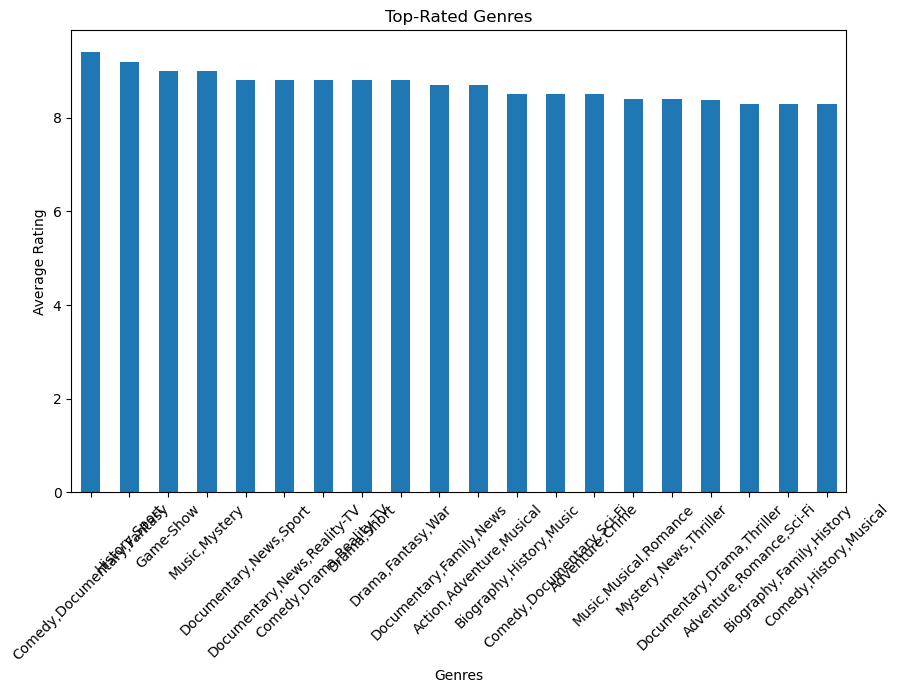

In [265]:
# Visualize the data

import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average rating for each genre

genre_ratings = df.groupby('genres')['averagerating'].mean().sort_values(ascending=False)

# Select the top-rated genres 

top_rated_genres = genre_ratings.head(20)

# Create a bar chart to visualize the top-rated genres
plt.figure(figsize=(10, 6))
top_rated_genres.plot(kind='bar')
plt.title('Top-Rated Genres')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

5.3 Create insight on audience reception on different types of movies

Creating insights into audience reception for different types of movies involves analyzing and visualizing data to understand how different genres or movie attributes relate to audience ratings. Here's a step-by-step approach to gaining insights:

Group by Genres:

Group your dataset by the genres column.

In [266]:
genre_group = df.groupby('genres')
genre_group

Calculate Summary Statistics:

Calculate key summary statistics for each genre, such as the mean, median, and count of ratings. These statistics will provide an overview of how each genre is rated.

In [267]:
genre_stats = genre_group['averagerating'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)
genre_stats

,mean,median,count
genres,,,
"Comedy,Documentary,Fantasy",9.400000,9.4,1
"History,Sport",9.200000,9.2,1
Game-Show,9.000000,9.0,6
"Music,Mystery",9.000000,9.0,3
"Documentary,News,Sport",8.800000,8.8,2
...,...,...,...
"Adventure,Drama,Musical",2.333333,1.8,6
"Adventure,Crime,Romance",2.300000,2.3,1
"History,Sci-Fi,Thriller",2.300000,2.3,3


Visualize Genre Ratings:

Create visualizations to better understand how genres perform in terms of audience ratings. Here are some visualization ideas:
a. Bar Chart for Mean Ratings:

Create a bar chart to display the mean ratings for each genre, sorted by highest mean rating.

<Figure size 1200x600 with 0 Axes>

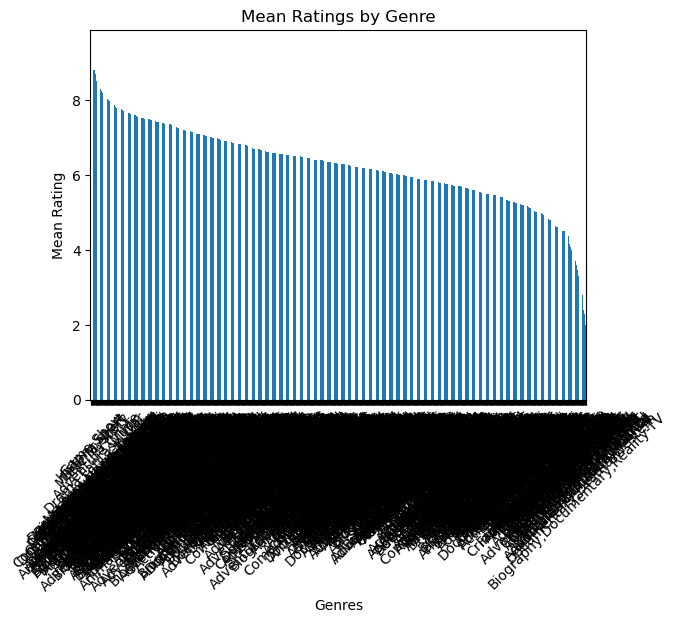

In [268]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
genre_stats[['mean']].plot(kind='bar', legend=False)
plt.title('Mean Ratings by Genre')
plt.xlabel('Genres')
plt.ylabel('Mean Rating')
plt.xticks(rotation=45)
plt.show()

b. Box Plot for Rating Distribution:

Create box plots to visualize the distribution of ratings within each genre. This can help you understand the spread of ratings and identify outliers.
python

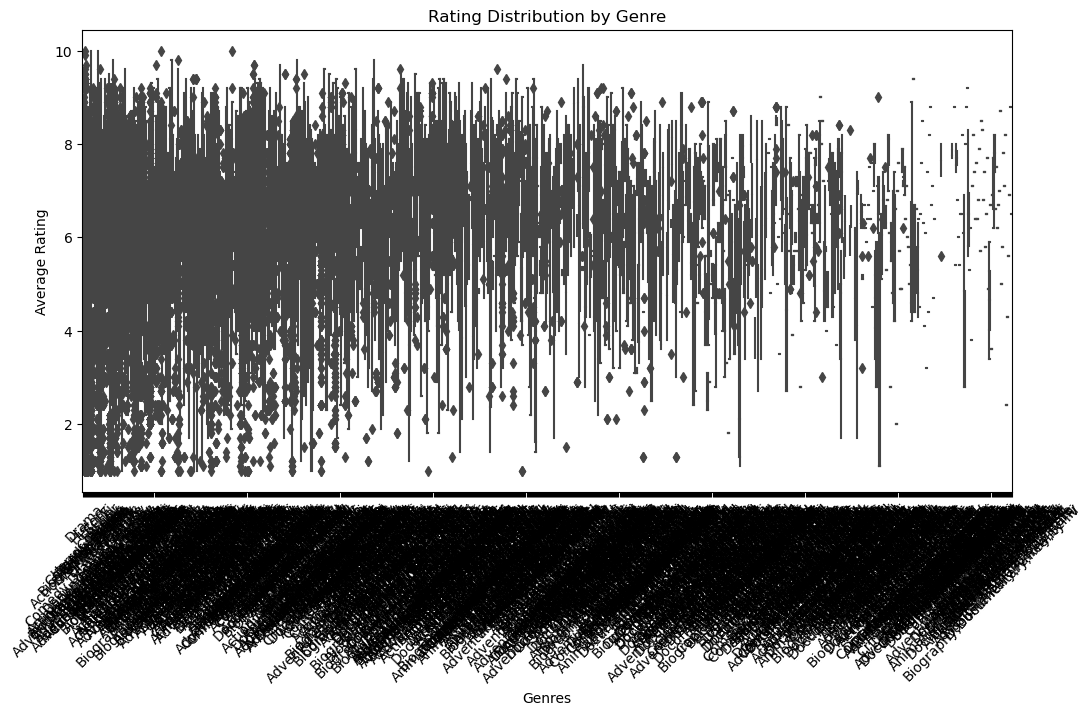

In [270]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='genres', y='averagerating', data=df)
plt.title('Rating Distribution by Genre')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

5.4 To create insight on which directors have highest numvotes and average ratings

In [273]:
# Group by Director:

# Group your dataset by the primary_name column, which represents the directors.

director_group = df.groupby('primary_name')
director_group

Calculate Summary Statistics:

In [276]:
# Calculate key summary statistics for each director, such as the sum of numvotes and the mean of averagerating. 
# These statistics will provide an overview of how each director's movies are rated 
# and how many votes their movies have received.

director_stats = director_group['numvotes', 'averagerating'].agg({'numvotes': 'sum', 'averagerating': 'mean'}).reset_index()
director_stats.head(30)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9532\1312913693.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  director_stats = director_group['numvotes', 'averagerating'].agg({'numvotes': 'sum', 'averagerating': 'mean'}).reset_index()


,primary_name,numvotes,averagerating
0,A Normale Jef,1426,7.200000
1,A'Ali de Sousa,55,4.200000
2,A. Blaine Miller,8,7.000000
3,A. Cengiz Mert,6,3.200000
4,A. Fishman,37,7.800000
5,A. Haluk Unal,5,8.800000
6,A. Jagadesh,291,3.500000
7,A. Joji,6,5.500000
8,A. Karunakaran,4676,5.812500
9,A. Lawrence Dreyfuss,17,7.000000


In [ ]:
Sort by Number of Votes:

In [278]:
# Sort the resulting DataFrame by the sum of numvotes in descending order 
# to find the directors with the highest number of votes.

top_directors_by_votes = director_stats.sort_values(by='numvotes', ascending=False)
top_directors_by_votes.head(30)

,primary_name,numvotes,averagerating
22159,James Gunn,18640459,6.266667
24831,Joe Russo,18421688,8.180645
4155,Anthony Russo,18421593,8.246667
55757,Zack Snyder,10576977,6.619231
9770,Christopher Nolan,10457390,8.437500
34880,Matthew Vaughn,9962120,7.500000
41392,Peter Jackson,8634677,7.743750
9758,Christopher Miller,6565719,7.421053
41643,Phil Lord,6565719,7.421053
28706,Kenneth Branagh,6454844,6.850000


In [ ]:
Sort by Average Rating:

In [280]:
# Sort the DataFrame by the mean of averagerating in descending order to find the directors with the highest average ratings.

top_directors_by_rating = director_stats.sort_values(by='averagerating', ascending=False)
top_directors_by_rating.head(30)

,primary_name,numvotes,averagerating
36390,Michiel Brongers,5,10.0
34224,Masahiro Hayakawa,5,10.0
15248,Emre Oran,6,10.0
30986,Lindsay Thompson,7,10.0
21383,Ivana Diniz,10,10.0
52842,Tristan David Luciotti,6,10.0
8503,Chad Carpenter,5,10.0
49545,Stephen Peek,20,10.0
31282,Loreto Di Cesare,16,10.0
27828,Kalyan Varma,10,9.9


In [ ]:
Visualize the Data:

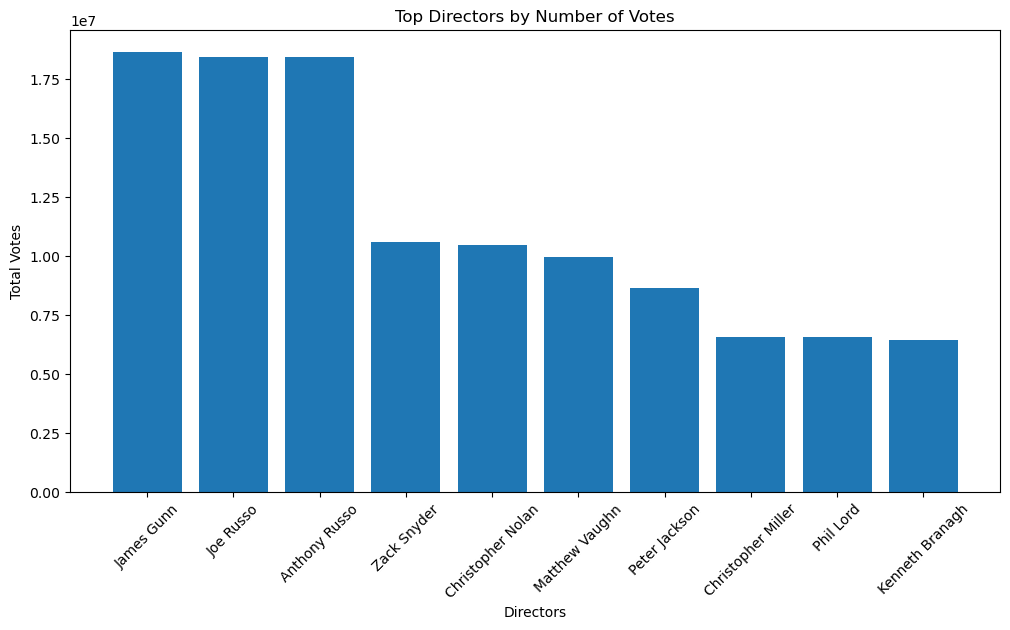

In [281]:
# Create visualizations, such as bar charts, to display the top directors with the highest number of votes and the highest average ratings.

import matplotlib.pyplot as plt

# Bar chart for top directors by number of votes
plt.figure(figsize=(12, 6))
plt.bar(top_directors_by_votes['primary_name'].head(10), top_directors_by_votes['numvotes'].head(10))
plt.title('Top Directors by Number of Votes')
plt.xlabel('Directors')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.show()

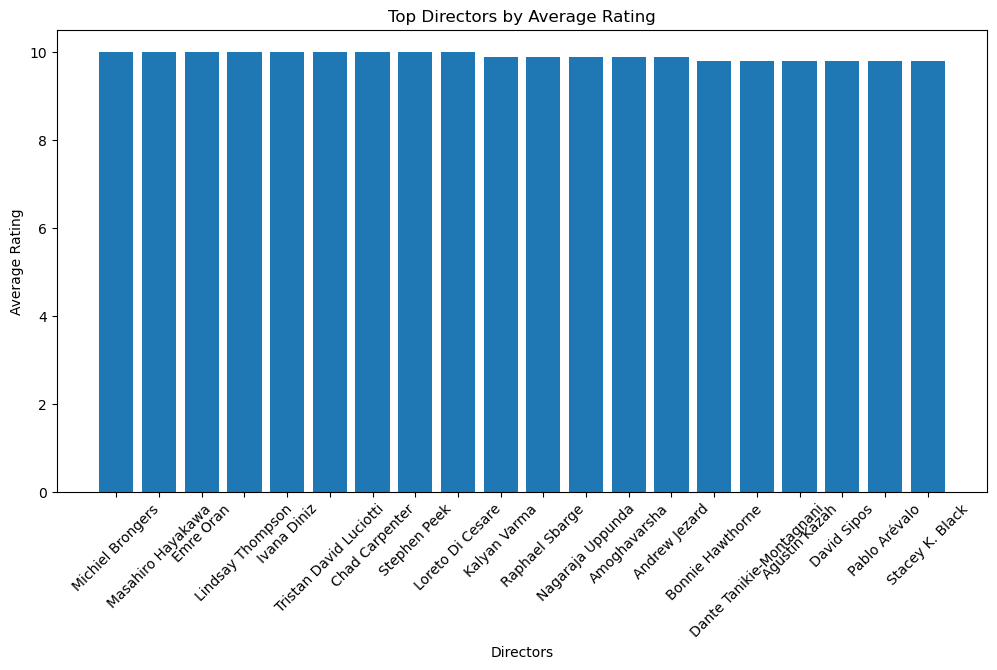

In [284]:
# Bar chart for top directors by average rating

plt.figure(figsize=(12, 6))
plt.bar(top_directors_by_rating['primary_name'].head(20), top_directors_by_rating['averagerating'].head(20))
plt.title('Top Directors by Average Rating')
plt.xlabel('Directors')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

These steps will help identify the directors who have received the highest number of votes 
and have the highest average ratings for their movies.

In [ ]:
Recommendations